In [ ]:
#!pip install plotly
import pandas as pd
import math
import os.path
import time
import numpy as np

import seaborn as sb
from datetime import timedelta, datetime
from dateutil import parser
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
#necessary imports:

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR

In [ ]:
#path = './Data/database_cripto.csv'
df=pd.read_csv("database_cripto.csv", sep=";",index_col="open_time",parse_dates=True)

df

,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,n_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
open_time,,,,,,,,,,,
2023-01-11 21:20:00,17537.04,17540.00,17533.93,17537.73,141.70726,2023-01-11 21:20:59.999,2.485162e+06,3358,65.55137,1.149605e+06,0
2023-01-11 21:21:00,17537.73,17538.58,17532.25,17532.80,106.08808,2023-01-11 21:21:59.999,1.860273e+06,2851,41.79720,7.329420e+05,0
2023-01-11 21:22:00,17533.24,17535.12,17531.09,17533.73,95.93976,2023-01-11 21:22:59.999,1.682132e+06,2900,54.45694,9.548246e+05,0
2023-01-11 21:23:00,17533.32,17539.55,17532.84,17536.70,106.43181,2023-01-11 21:23:59.999,1.866468e+06,2928,53.06219,9.305454e+05,0
2023-01-11 21:24:00,17537.17,17549.44,17536.70,17547.89,243.78498,2023-01-11 21:24:59.999,4.276986e+06,4129,138.86932,2.436329e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-12 13:55:00,18281.25,18310.31,18279.38,18292.27,1176.00781,2023-01-12 13:55:59.999,2.151625e+07,14384,553.07324,1.011965e+07,0
2023-01-12 13:56:00,18292.27,18294.91,18251.84,18267.99,873.86879,2023-01-12 13:56:59.999,1.596422e+07,13240,421.42180,7.698621e+06,0
2023-01-12 13:57:00,18269.88,18271.72,18238.71,18249.36,708.08359,2023-01-12 13:57:59.999,1.292688e+07,10812,339.69993,6.201898e+06,0


In [ ]:
config={'text': 'visualization of price Value'}
fig = go.Figure(data=[go.Scatter(x=df.index, y=df['open_price'])])

fig.update_layout(title = config , template="plotly_dark") ##Available templates:['ggplot2', 'seaborn', 'simple_white', 'plotly','plotly_white', 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']

fig.show()

In [ ]:
### Plotting the candlestick
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open_price'], high=df['high_price'],
    low=df['low_price'], close=df['close_price'],
    increasing_line_color= 'blue', decreasing_line_color= 'orange'
)])

fig.show()

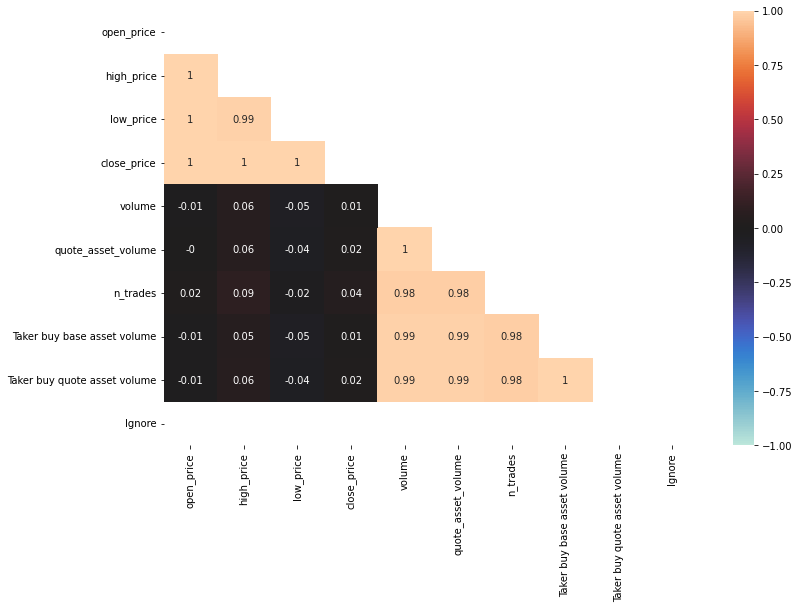

In [ ]:
plt.figure(figsize=(12, 8))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sb.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, mask=mask)

plt.show()

In [73]:
close_price = df['close_price']
train_data=df[0:int(len(df["close_price"])*0.75)]
test_data=df[int(len(df["close_price"])*0.75):]

close_train=train_data['close_price']
close_test=test_data['close_price']


In [74]:
train_data

,open_price,high_price,low_price,close_price,volume,close_time,quote_asset_volume,n_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
open_time,,,,,,,,,,,
2023-01-11 21:20:00,17537.04,17540.00,17533.93,17537.73,141.70726,2023-01-11 21:20:59.999,2.485162e+06,3358,65.55137,1.149605e+06,0
2023-01-11 21:21:00,17537.73,17538.58,17532.25,17532.80,106.08808,2023-01-11 21:21:59.999,1.860273e+06,2851,41.79720,7.329420e+05,0
2023-01-11 21:22:00,17533.24,17535.12,17531.09,17533.73,95.93976,2023-01-11 21:22:59.999,1.682132e+06,2900,54.45694,9.548246e+05,0
2023-01-11 21:23:00,17533.32,17539.55,17532.84,17536.70,106.43181,2023-01-11 21:23:59.999,1.866468e+06,2928,53.06219,9.305454e+05,0
2023-01-11 21:24:00,17537.17,17549.44,17536.70,17547.89,243.78498,2023-01-11 21:24:59.999,4.276986e+06,4129,138.86932,2.436329e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-12 09:45:00,18162.83,18166.32,18161.38,18162.57,105.17554,2023-01-12 09:45:59.999,1.910444e+06,3482,48.75640,8.856493e+05,0
2023-01-12 09:46:00,18161.66,18163.69,18155.61,18160.67,165.39954,2023-01-12 09:46:59.999,3.003607e+06,3901,72.12674,1.309849e+06,0
2023-01-12 09:47:00,18160.66,18163.67,18159.20,18161.88,63.77089,2023-01-12 09:47:59.999,1.158195e+06,2791,31.46752,5.715192e+05,0


In [75]:
# Before moving on, we need to normalize our data to have good models
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_train=np.array(scaler.fit_transform(np.array(close_train).reshape(-1,1)))
close_test=np.array(scaler.fit_transform(np.array(close_test).reshape(-1,1)))

In [77]:
def Vect(train,test,timestamp):
    X_train,X_test=np.zeros((len(train)-timestamp,timestamp)),np.zeros((len(test)-timestamp,timestamp))
    y_train,y_test=np.array(train[timestamp:]),np.array(test[timestamp:]) #The first element will need the 'timestamp' previous values
     # loop through the train data:
    for i in range(timestamp,len(train)):
        Xtrain=train[i-timestamp:i]
        if len(Xtrain)==timestamp:
            X_train[i-timestamp,:] = np.array(Xtrain).reshape((timestamp,))
    for i in range(timestamp,len(test)):
        Xtest=test[i-timestamp:i]
        if len(Xtest)==timestamp:
            X_test[i-timestamp,:] = np.array(Xtest).reshape((timestamp,))
    return X_train,X_test,y_train,y_test

In [78]:
timestamp=10
X_train,X_test,y_train,y_test=Vect(close_train,close_test,10)

In [79]:
print("the shape of X_train is {0}, {1}".format(len(X_train),len(X_train[0])))
print("the shape of y_train is {0}".format(y_train.shape))
print("the shape of X_test is {0}, {1}".format(len(X_test),len(X_test[0])))
print("the shape of y_test is {0}".format(y_test.shape))

the shape of X_train is 740, 10
the shape of y_train is (740, 1)
the shape of X_test is 240, 10
the shape of y_test is (240, 1)


In [80]:
LinReg = LinearRegression()


XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

#Initializing the RandomForestRegressor

RandomForest = RandomForestRegressor(max_depth=1000)

#Initializing the SDGRegressor

# Initializing the Ridge
ridgereg = Ridge()

# Initializin the Lasso
lassoreg=Lasso(max_iter=10000)

# Initializing the Linea SVR


SVRreg=LinearSVR(random_state=0, tol=1e-5)

#in order to simlify the task we are going to create a dictionnary to map each model to a name

models = {"Linear Regression":LinReg, "XGBoost Regressor":XGBR, "Random Forest Regressor":RandomForest,"Ridge Regressor":ridgereg,"Lasso regressor":lassoreg,"SVR":SVRreg}

In [81]:
X_train[0:10]
XTRAIN=np.array([np.array(xi) for xi in X_train])
XTRAIN.ndim
XTRAIN.reshape(-1, XTRAIN.shape[-1])
XTRAIN.shape

(740, 10)

In [82]:
training=train_data.copy()
testing=test_data.copy()
training.drop(training.columns.difference(['close_price']), 1, inplace=True)
training["scaled_close"]=scaler.fit_transform(training)
training = training.iloc[timestamp: , :]
testing.drop(testing.columns.difference(['close_price']), 1, inplace=True)
testing["scaled_close"]=scaler.fit_transform(testing)
testing = testing.iloc[timestamp: , :]
#prediction=pd.DataFrame()
#prediction=[pd.DataFrame(),pd.DataFrame(test_data.iloc[timestamp:,3])]
#type(train_data.iloc[timestamp:,3])
print("shape of train:",training.shape)
print("shape of test:",testing.shape)
prediction=[training,testing]
prediction=pd.concat(prediction)
print("shape of join:",prediction.shape)
#prediction=scaler.fit_transform(prediction)
#prediction["scaled_close"]=scaler.fit_transform(prediction)

shape of train: (740, 2)
shape of test: (240, 2)
shape of join: (980, 2)


<ipython-input-82-7616a45de373>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

<ipython-input-82-7616a45de373>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [83]:
# Let's create a function that train all the models above
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def training(model):
    models[model].fit(X_train,y_train)
    y_pred_test = models[model].predict(X_test)
    y_pred_train = models[model].predict(X_train)
    prediction[model]=np.concatenate((y_pred_train,y_pred_test), axis=0)
    print("\n---------------"+model+"---------------\n")
    print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, y_pred_test)))
    print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, y_pred_test)))+"\n")
    return (mean_absolute_error(y_test, y_pred_test),math.sqrt(mean_squared_error(y_test, y_pred_test)))

In [84]:
# Now we are going to train the models:
i=1
MSE=[]
MAE=[]
for model in models:
    
    print(i)
    metrics=training(model)
    MSE.append(metrics[1])
    MAE.append(metrics[0])
    i=i+1
results=[MSE,MAE]
models_results=pd.DataFrame(results,columns=models.keys(),index =['MSE','MAE'])

1

---------------Linear Regression---------------

Mean Absolute Error - MAE : 0.034230785321835204
Root Mean squared Error - RMSE : 0.06446090332677605

2
[14:41:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

---------------XGBoost Regressor---------------

Mean Absolute Error - MAE : 0.0545204328286695
Root Mean squared Error - RMSE : 0.0864221939786602

3


<ipython-input-83-d7b75a76301f>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




---------------Random Forest Regressor---------------

Mean Absolute Error - MAE : 0.05473027969622353
Root Mean squared Error - RMSE : 0.08679935892554257

4

---------------Ridge Regressor---------------

Mean Absolute Error - MAE : 0.04244997782132871
Root Mean squared Error - RMSE : 0.07517162614185847

5

---------------Lasso regressor---------------

Mean Absolute Error - MAE : 0.15009531666996298
Root Mean squared Error - RMSE : 0.17738238666125242

6

---------------SVR---------------

Mean Absolute Error - MAE : 0.035669541143781555
Root Mean squared Error - RMSE : 0.06631178761860085



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
models_results

,Linear Regression,XGBoost Regressor,Random Forest Regressor,Ridge Regressor,Lasso regressor,SVR
MSE,0.093153,0.168847,0.158631,0.085753,0.527699,0.076238
MAE,0.075668,0.151238,0.144595,0.068127,0.432587,0.063892


In [85]:
prediction

,close_price,scaled_close,Linear Regression,XGBoost Regressor,Random Forest Regressor,Ridge Regressor,Lasso regressor,SVR
open_time,,,,,,,,
2023-01-11 21:30:00,17554.75,0.047817,0.044212,0.047165,0.045623,0.051223,0.684587,0.044483
2023-01-11 21:31:00,17555.21,0.048409,0.052217,0.048610,0.048098,0.054026,0.684587,0.050243
2023-01-11 21:32:00,17553.38,0.046056,0.051245,0.045737,0.046386,0.055832,0.684587,0.052602
2023-01-11 21:33:00,17547.70,0.038755,0.049269,0.039915,0.042599,0.055998,0.684587,0.051093
2023-01-11 21:34:00,17551.28,0.043357,0.043111,0.043234,0.042618,0.053332,0.684587,0.045056
...,...,...,...,...,...,...,...,...
2023-01-12 13:55:00,18292.27,0.943189,0.912702,0.871214,0.885060,0.788091,0.684587,0.882615
2023-01-12 13:56:00,18267.99,0.849545,0.969779,0.881439,0.904563,0.856328,0.684587,0.949096
2023-01-12 13:57:00,18249.36,0.777692,0.841216,0.894237,0.893856,0.861413,0.684587,0.881868


In [86]:
for model in models.keys():
    fig = px.line(prediction,x=prediction.index, y=[prediction['scaled_close'],prediction[model]],
                  labels={'value':'Close price','date': 'Date'})
    fig.update_layout(title_text='Prediction avec le '+model,
                      plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
    fig.add_trace(go.Scatter(mode="markers", x=df["Date"], y=df["AAPL.Close"], name="daily"))
    fig.show()